In [590]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statistics import mean
import statsmodels.api as SM
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings('ignore')
sns.set(style='darkgrid', palette ='deep')

In [2]:
df = pd.read_csv('/Users/hardey/Desktop/Fortray/DS WITH PYTHON/Walmart_Store_sales.csv')
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


Check the shape and also confirm if there are any missing values in the dataframe

In [3]:
print('Shape of data ', df.shape) 
df.isnull().sum()

Shape of data  (6435, 8)


Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

Checking the data types, it is observed that the date column data type needs to be casted to datetime

In [4]:
df.dtypes

Store             int64
Date             object
Weekly_Sales    float64
Holiday_Flag      int64
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
dtype: object

check the statistics of the dataframe to see if there is any irregularities

In [5]:
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


casting the date column to a datetime object and creating a new columm for year and month

In [7]:
df['Date'] = pd.to_datetime(df['Date'],infer_datetime_format=True) 
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month_name()
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,2010,May
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,2010,December
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010,February
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010,February
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,2010,May


Top 5 stores with the highest sales

In [8]:
top_5_store_total = df.groupby(['Store'])[['Weekly_Sales']].sum().sort_values(by='Weekly_Sales',ascending=False)[:5].reset_index()
top_5_store_total

,Store,Weekly_Sales
0,20,3.013978e+08
1,4,2.995440e+08
2,14,2.889999e+08
3,13,2.865177e+08
4,2,2.753824e+08


Top 5 stores with the highest standard deviation for sales

In [9]:
top_5_store_sd = df.groupby(['Store'])[['Weekly_Sales']].std().sort_values(by='Weekly_Sales',ascending=False)[:5].reset_index()
top_5_store_sd

,Store,Weekly_Sales
0,14,317569.949476
1,10,302262.062504
2,20,275900.562742
3,4,266201.442297
4,13,265506.995776


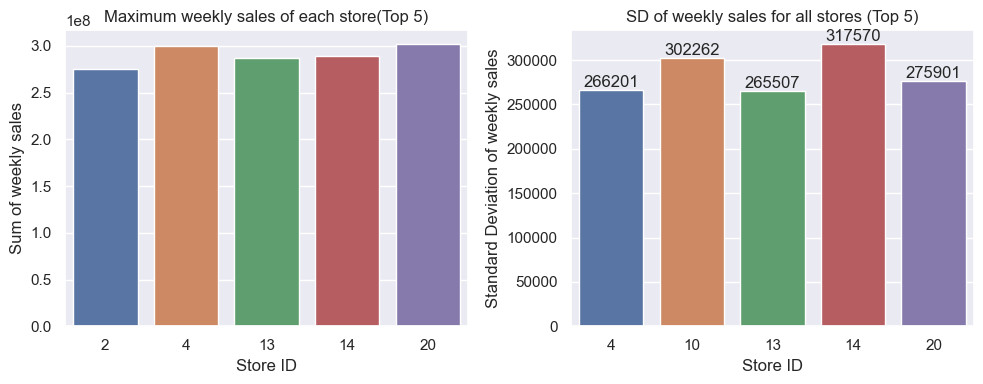

In [10]:
fig , ax = plt.subplots(ncols = 2,figsize =(10,4))
sns.barplot(data=top_5_store_total,x='Store',y='Weekly_Sales',ax=ax[0])
sns.barplot(data=top_5_store_sd,x='Store',y='Weekly_Sales',ax=ax[1])
ax[0].set(title ='Maximum weekly sales of each store(Top 5)',xlabel='Store ID',ylabel='Sum of weekly sales')
ax[1].set(title ='SD of weekly sales for all stores (Top 5)',xlabel='Store ID',ylabel='Standard Deviation of weekly sales')
ax[1].bar_label(ax[1].containers[0])
fig.tight_layout()
plt.show()

Calculating the % growth rate for Q3 of 2012 , this can be done by calculating the weekly sales for Q2 2012 and Q3 2012.

In [11]:
# weekly sales in Q2 for each store
q2_2012_sales = df[df['Date'].between('2012-04-01','2012-06-30',inclusive='both')]
q2_sales_df = q2_2012_sales.groupby(['Store']).sum()[['Weekly_Sales']].reset_index()

# weekly sales in Q3 for each store
q3_2012_sales = df[df['Date'].between('2012-07-01','2012-09-30',inclusive='both')]
q3_sales_df = q3_2012_sales.groupby(['Store'])[['Weekly_Sales']].sum().reset_index()

# merging q2_2012 and q3_2012 dataframe together
growth_rate = pd.merge(q2_sales_df,q3_sales_df,how='inner',on='Store')
growth_rate.rename(columns={'Weekly_Sales_x':'Q2 Weekly sales', 'Weekly_Sales_y':'Q3 Weekly sales'},inplace=True)

In [12]:
# creating a calculated column for the growth rate difference between q2 2012 and q3 2012 for each store.
growth_rate['Growth rate %'] = round((growth_rate['Q3 Weekly sales']- growth_rate['Q2 Weekly sales'])/growth_rate['Q2 Weekly sales'],4) * 100
top5_growthrate = growth_rate.sort_values(by='Growth rate %',ascending=False)[:5]
top5_growthrate

,Store,Q2 Weekly sales,Q3 Weekly sales,Growth rate %
15,16,6626133.44,6441311.11,-2.79
6,7,7613593.92,7322393.92,-3.82
34,35,10753570.97,10252122.68,-4.66
25,26,13218289.66,12417575.35,-6.06
38,39,20191585.63,18899955.17,-6.40


Finding the mean sales for each holiday and Non Holiday season

In [13]:
holiday1 = {'Super Bowl':['2010-02-12','2011-02-11','2012-02-10','2013-02-08']}
holiday2 = {'Labour Day':['2010-09-10','2011-09-09','2012-09-07','2013-09-06']}
holiday3 = {'Thanksgiving':['2010-11-26','2011-11-25','2012-11-23','2013-11-29']}
holiday4 = {'Christmas':['2010-12-31','2011-12-30','2012-12-28','2013-12-27']}
holidays = [holiday1,holiday2,holiday3,holiday4]

In [14]:
def holiday_mean_sales(holidays):
    holiday_sales = {'Non Holiday':round((df[df['Holiday_Flag']==0]['Weekly_Sales'].mean()),2)}
    for holiday in holidays:
        for key,value in holiday.items():
            mean_sales = []
            for dates in value:
                sales = df[df['Date']==dates]['Weekly_Sales'].mean()
                if np.isnan(sales):
                    pass
                else:   
                    mean_sales.append(sales) 
            if mean_sales:
                holiday_sales[key] = round((sum(mean_sales)/len(mean_sales)),2)
            
    return holiday_sales

mean_season_sales = holiday_mean_sales(holidays)

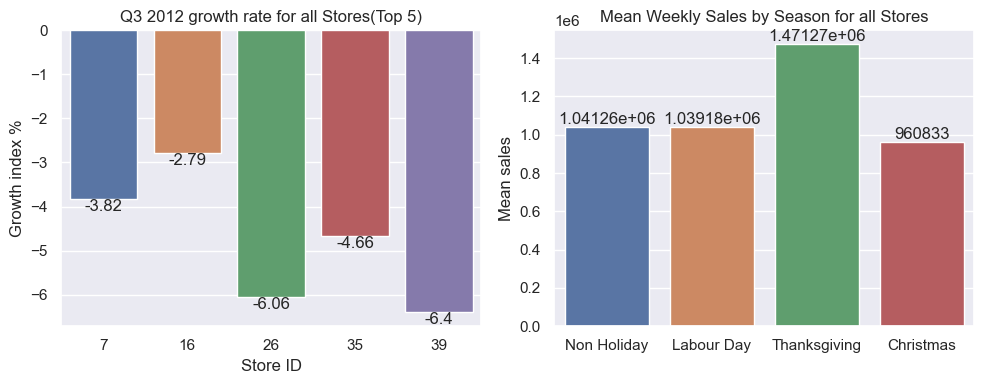

In [18]:
fig , ax = plt.subplots(ncols = 2,figsize =(10,4))
sns.barplot(data=top5_growthrate,x='Store',y='Growth rate %',ax=ax[0])
sns.barplot(x= list(mean_season_sales.keys()),y=list(mean_season_sales.values()),ax=ax[1])

ax[0].set(title ='Q3 2012 growth rate for all Stores(Top 5)',xlabel='Store ID',ylabel='Growth index %')
ax[1].set(title ='Mean Weekly Sales by Season for all Stores',ylabel='Mean sales')

ax[0].bar_label(ax[0].containers[0])
ax[1].bar_label(ax[1].containers[0])
fig.tight_layout()
plt.show()

Monthly sales in each year for all stores 

In [16]:
monthly_sales = df.groupby(['Year','Month']).sum()['Weekly_Sales'].reset_index()
monthly_sales.head()

,Year,Month,Weekly_Sales
0,2010,April,1.838118e+08
1,2010,August,1.845381e+08
2,2010,December,3.235716e+08
3,2010,February,1.915869e+08
4,2010,January,4.223988e+07


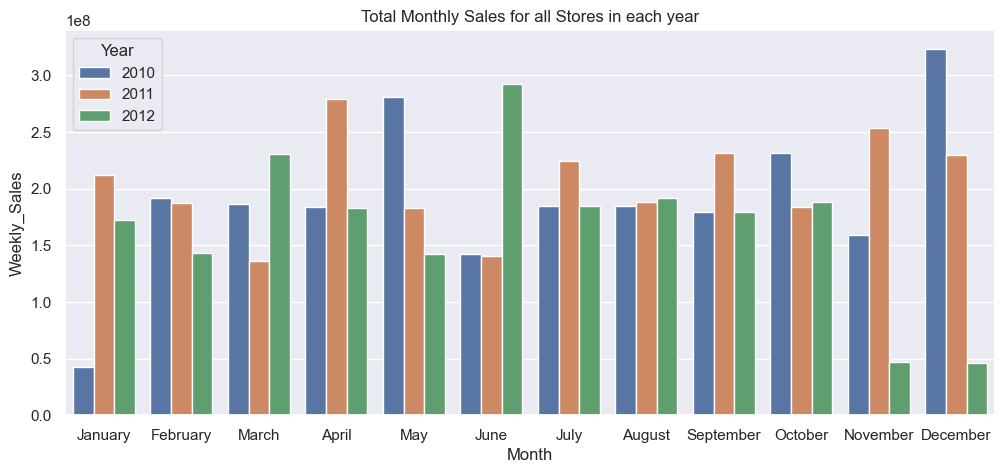

In [17]:
plt.figure(figsize=(12,5))
order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'] 
ax = sns.barplot(data=monthly_sales,y='Weekly_Sales',x='Month',hue='Year',order=order)
ax.set(title='Total Monthly Sales for all Stores in each year')
plt.show()

Yearly sales for all stores

In [41]:
yearly_sales = df.groupby('Year').sum()['Weekly_Sales'].reset_index()
yearly_sales

,Year,Weekly_Sales
0,2010,2.288886e+09
1,2011,2.448200e+09
2,2012,2.000133e+09


Creating a quarter column

In [19]:
def get_quater(x):
    """ function to get the quarter each sales fall into"""
    if x in ['January', 'February', 'March']:
        return 'First Quarter'
    elif x in ['April', 'May', 'June']:
        return 'Second Quarter'
    elif x in ['July', 'August', 'September']:
        return 'Third Quarter'
    else:
        return 'Fourth Quarter'

In [20]:
df['Quarter'] = df['Month'].apply(get_quater)
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Quarter
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,2010,May,Second Quarter
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,2010,December,Fourth Quarter
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010,February,First Quarter
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010,February,First Quarter
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,2010,May,Second Quarter


Getting the total weekly sale for all stores grouped by year and quater

In [40]:
quarterly_sales = df.groupby(['Year','Quarter']).sum()['Weekly_Sales'].reset_index()
quarterly_sales.head()

,Year,Quarter,Weekly_Sales
0,2010,First Quarter,4.200530e+08
1,2010,Fourth Quarter,7.134649e+08
2,2010,Second Quarter,6.068598e+08
3,2010,Third Quarter,5.485085e+08
4,2011,First Quarter,5.360954e+08


Getting the total weekly sale for each semester.

In [24]:
def get_semester(x):
    if x in pd.date_range(start='2010-01-01', end='2010-06-30'):
        return '2010 (1st semster)'
    elif x in pd.date_range(start='2010-07-01',end='2010-12-31'):
        return '2010 (2nd semster)'
    elif x in pd.date_range(start='2011-01-01',end='2011-06-30'):
        return '2011 (1st semster)'
    elif x in pd.date_range(start='2011-07-01',end='2011-12-31'):
        return '2011 (2nd semster)'
    elif x in pd.date_range(start='2012-01-01',end='2012-06-30'):
        return '2012 (1st semster)'
    elif x in pd.date_range(start='2012-07-01',end='2012-12-31'):
        return '2012 (2nd semster)'

In [25]:
df['Semester'] = df['Date'].apply(get_semester)

In [36]:
semester_sales = df.groupby('Semester').sum()['Weekly_Sales'].reset_index()
semester_sales.sort_values(by='Weekly_Sales')

,Semester,Weekly_Sales
5,2012 (2nd semster),8.371288e+08
0,2010 (1st semster),1.026913e+09
2,2011 (1st semster),1.138060e+09
4,2012 (1st semster),1.163004e+09
1,2010 (2nd semster),1.261973e+09
3,2011 (2nd semster),1.310140e+09


<Figure size 2700x500 with 0 Axes>

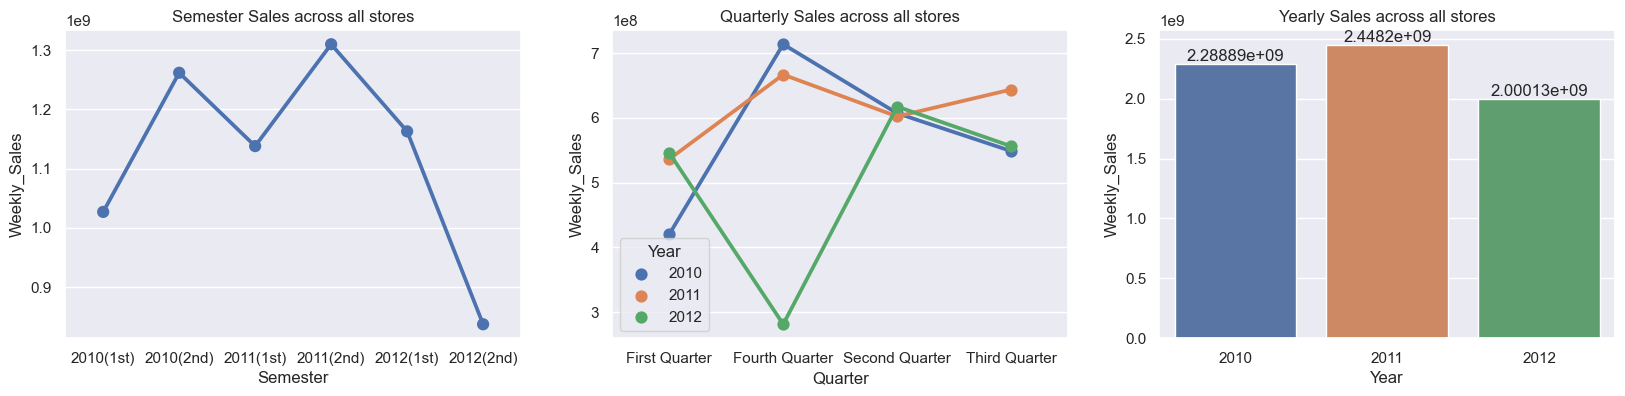

In [32]:
plt.figure(figsize=(27,5))
fig, ax = plt.subplots(ncols=3,figsize=(20,4))

sns.pointplot(data=semester_sales,x='Semester',y='Weekly_Sales', ax=ax[0])
sns.pointplot(data=quarterly_sales,x='Quarter',y='Weekly_Sales',hue='Year',ax=ax[1])
sns.barplot(data=yearly_sales,x='Year',y='Weekly_Sales',ax=ax[2])

ax[0].set(title='Semester Sales across all stores')
ax[1].set(title='Quarterly Sales across all stores')
ax[2].set(title='Yearly Sales across all stores')

ticks = ['2010(1st)','2010(2nd)','2011(1st)','2011(2nd)','2012(1st)','2012(2nd)']
ax[0].set_xticklabels(ticks)
ax[2].bar_label(ax[2].containers[0])
plt.show()

# Analysis on Store 

Creating a new data with only sales from store 1 to perform analysis and build a predictive model

In [332]:
store1_df = df[df['Store']==1].sort_values(by='Date', ascending = True).reset_index(drop=True)
store1_df['Day Count'] = [i for i in range(1, len(store1_df)+1)]
store1_df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Quarter,Semester,Day Count
0,1,2010-01-10,1453329.50,0,71.89,2.603,211.671989,7.838,2010,January,First Quarter,2010 (1st semster),1
1,1,2010-02-04,1594968.28,0,62.27,2.719,210.820450,7.808,2010,February,First Quarter,2010 (1st semster),2
2,1,2010-02-07,1492418.14,0,80.91,2.669,211.223533,7.787,2010,February,First Quarter,2010 (1st semster),3
3,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010,February,First Quarter,2010 (1st semster),4
4,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010,February,First Quarter,2010 (1st semster),5


We need to investigate our data and check the correlation between each numerical column and also check its distribution.

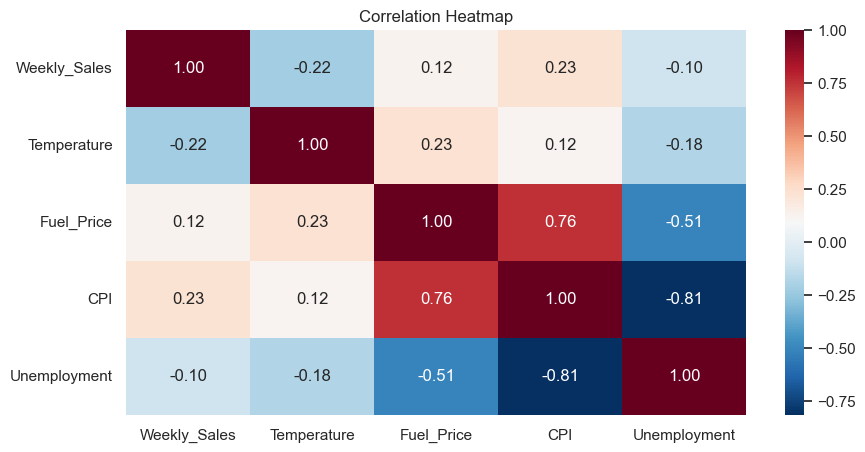

In [539]:
plt.figure(figsize=(10,5))
numerical_colums = ['Weekly_Sales','Temperature','Fuel_Price','CPI','Unemployment']
correlation = store1_df[numerical_colums].corr(method='pearson')
corr = sns.heatmap(correlation,annot=True,fmt='.2f',cmap='RdBu_r')
corr.set(title='Correlation Heatmap')
plt.show()

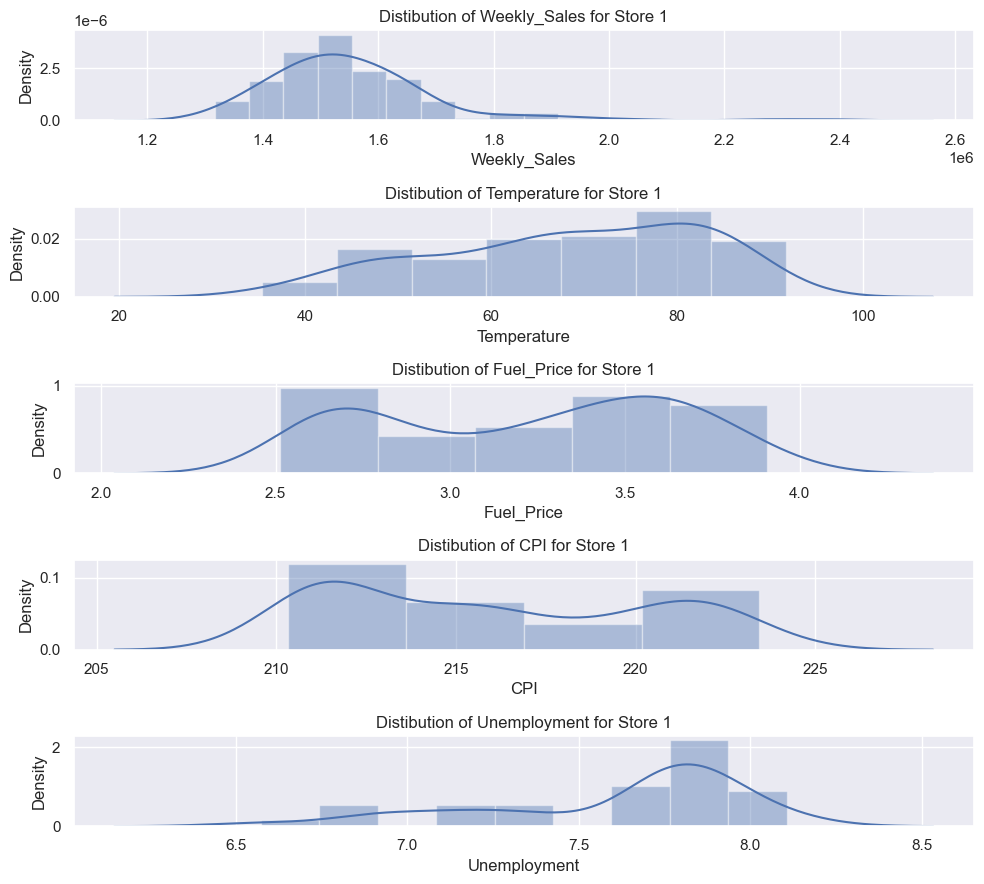

In [591]:
fig, ax = plt.subplots(nrows=5, figsize=(10,9))
for i,col in enumerate(numerical_colums):
    sns.distplot(store1_df[col], kde=True,ax=ax[i])
    ax[i].set(title = f'Distibution of {col} for Store 1')
fig.tight_layout()

Using box plot to detect outliers

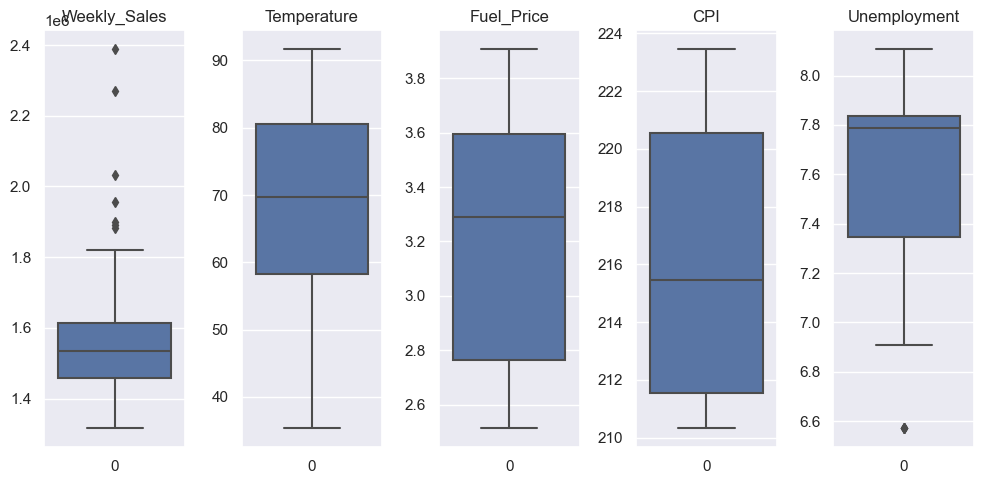

In [335]:
fig, ax = plt.subplots(ncols=5, figsize=(10,5))
for i,col in enumerate(numerical_colums):
    sns.boxplot(data = store1_df[col],ax=ax[i])
    ax[i].set(title = col)
fig.tight_layout()

Observations: 

* The Weekly_Sales Column follows a normal distribution, so we will be using the Z-score method to remove outliers.
* The IQR method will be applied on the Unemployment column since it is a skewed distribution.

Checking the number of outliers in the numerical columns manually

In [336]:
def detect_outliers_zsore(df):
    outliers = []
    thres = 3
    mean = df.mean()
    stdv = df.std()
    for i in df:
        z_score = (i-mean)/stdv
        if np.abs(z_score) > thres:
            outliers.append(i)
    return outliers

In [337]:
def IQR_range_ooutlier(df):
     outliers = []
     Q1 = np.percentile(df,25)
     Q3 = np.percentile(df,75)
     IQR = Q3-Q1 
     lower = Q1 - (1.5*IQR)
     upper = Q3 + (1.5*IQR)
     for i in df:
         if i < lower or i > upper:
             outliers.append(i)
     return outliers    

In [338]:
print('Using Z-Score method')
for col in numerical_colums:
    print(f'There are {len(detect_outliers_zsore(store1_df[col]))} ouliters in {col} Column')

Using Z-Score method
There are 3 ouliters in Weekly_Sales Column
There are 0 ouliters in Temperature Column
There are 0 ouliters in Fuel_Price Column
There are 0 ouliters in CPI Column
There are 0 ouliters in Unemployment Column


In [339]:
print('Using IQR method')
for col in numerical_colums:
    print(f'There are {len(IQR_range_ooutlier(store1_df[col]))} ouliters in {col} Column')

Using IQR method
There are 7 ouliters in Weekly_Sales Column
There are 0 ouliters in Temperature Column
There are 0 ouliters in Fuel_Price Column
There are 0 ouliters in CPI Column
There are 4 ouliters in Unemployment Column


In [358]:
new_store1_df = store1_df.copy()

In [341]:
def zscore(df):
    mean = df.mean()
    stdv = df.std()
    z_score = (df-mean)/stdv
    return z_score

Getting the index of rows with outliers in the Weekly_Sales column

In [354]:
thres = 3
drop_index1 = np.where(zscore(new_store1_df['Weekly_Sales']) > thres)

Getting the index of the rows outliers in the Unemployment column

In [355]:
Q1 = np.percentile(new_store1_df['Unemployment'],25)
Q3 = np.percentile(new_store1_df['Unemployment'],75)
IQR = Q3-Q1 
lower = Q1 - (1.5*IQR)
upper = Q3 + (1.5*IQR) 
drop_index2 = np.where(new_store1_df['Unemployment']< lower)
drop_index3 = np.where(new_store1_df['Unemployment']> upper)

Dropping the rows with outlliers

In [359]:
print('Shape before dropping rows with outliers: ',new_store1_df.shape)
new_store1_df.drop(index = drop_index1[0],inplace=True)
new_store1_df.drop(index = drop_index2[0],inplace=True)
new_store1_df.drop(index = drop_index3[0],inplace=True)
print('Shape after dropping rows with outliers: ',new_store1_df.shape)

Shape before dropping rows with outliers:  (143, 13)
Shape after dropping rows with outliers:  (136, 13)


Setting dependent and independent variables

In [557]:
feature = ['Unemployment','Fuel_Price','CPI']
X = new_store1_df[feature]
y = new_store1_df['Weekly_Sales']

Splitting data for training and testing the model

In [496]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=94)

In [497]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((95, 3), (41, 3), (95,), (41,))

In [558]:
X2_train = SM.add_constant(X_train)
model = SM.OLS(y_train, X2_train).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           Weekly_Sales   R-squared:                       0.084
Model:                            OLS   Adj. R-squared:                  0.053
Method:                 Least Squares   F-statistic:                     2.766
Date:                Tue, 25 Oct 2022   Prob (F-statistic):             0.0463
Time:                        16:40:50   Log-Likelihood:                -1236.4
No. Observations:                  95   AIC:                             2481.
Df Residuals:                      91   BIC:                             2491.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -1.228e+06   1.66e+06     -0.738   

In [560]:
X2_test = SM.add_constant(X_test)
y_pred= model.predict(X2_test)

Nomalization  works better on a regression problem, so we will be applying the minmax scaler from sklearn on the independent variables.

In [571]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_train_scaled,X_test_scaled,y_train_scaled,y_test_scaled = train_test_split(X_scaled,y,test_size=0.3,random_state=94)
X_train_scaled.shape,X_test_scaled.shape,y_train_scaled.shape,y_test_scaled.shape

((95, 3), (41, 3), (95,), (41,))

In [572]:
X2_train_scaled = SM.add_constant(X_train_scaled)
model_scaled = SM.OLS(y_train_scaled, X2_train_scaled).fit()
print(model_scaled.summary())

                            OLS Regression Results                            
Dep. Variable:           Weekly_Sales   R-squared:                       0.084
Model:                            OLS   Adj. R-squared:                  0.053
Method:                 Least Squares   F-statistic:                     2.766
Date:                Tue, 25 Oct 2022   Prob (F-statistic):             0.0463
Time:                        16:45:19   Log-Likelihood:                -1236.4
No. Observations:                  95   AIC:                             2481.
Df Residuals:                      91   BIC:                             2491.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.465e+06   6.53e+04     22.437      0.0

In [516]:
X2_test_scaled = SM.add_constant(X_test_scaled)
y_scaled_pred= model_scaled.predict(X2_test_scaled)

Regression plots

[Text(0.5, 1.0, 'Normalized Regression Plot'),
 Text(0.5, 0, 'Actual'),
 Text(0, 0.5, 'Predicted')]

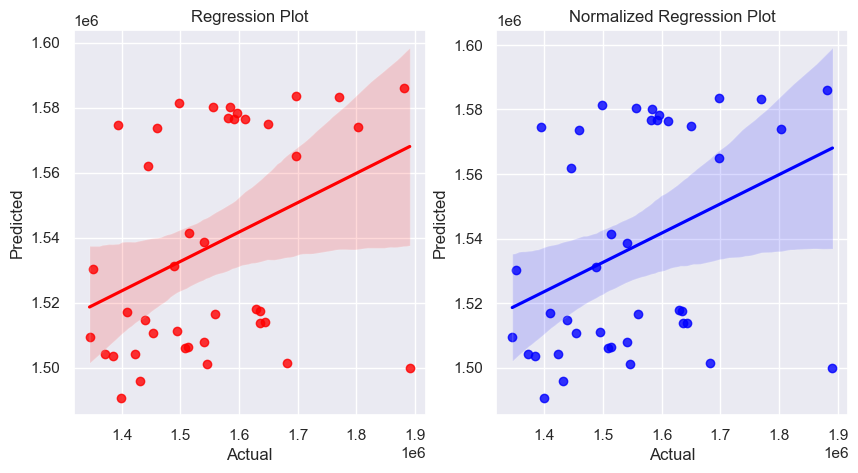

In [602]:
fig , ax = plt.subplots(ncols=2,figsize=(10,5))
sns.regplot(x=y_test,y=y_pred,color ='red', ax=ax[0])
ax[0].set(title = 'Regression Plot',xlabel ='Actual',ylabel ='Predicted')

sns.regplot(x=y_test_scaled,y=y_scaled_pred,color ='blue',ax=ax[1])
ax[1].set(title = 'Normalized Regression Plot',xlabel ='Actual',ylabel ='Predicted')

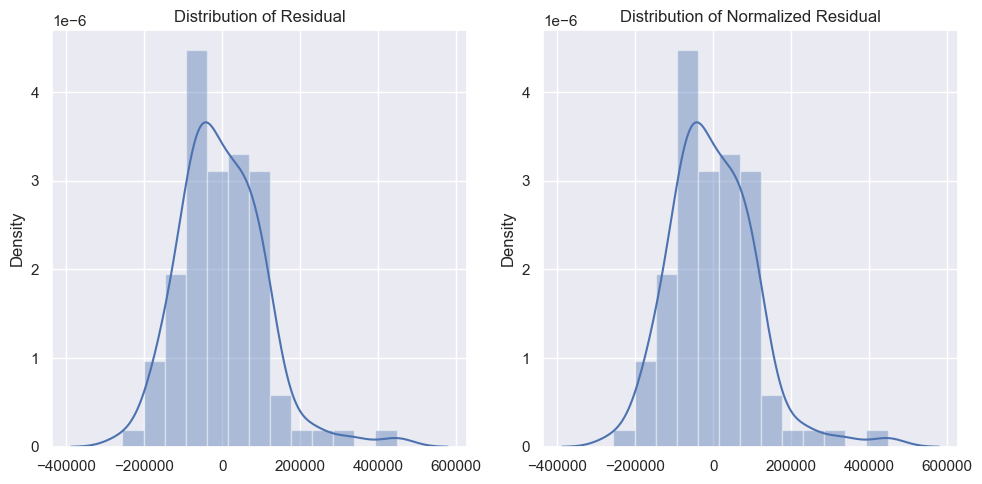

In [601]:
fig , ax = plt.subplots(ncols=2,figsize=(10,5))
sns.distplot(model_scaled.resid,kde=True,ax=ax[0])
ax[0].set(title = 'Distribution of Residual')

sns.distplot(model.resid,kde=True,ax=ax[1])
ax[1].set(title = 'Distribution of Normalized Residual')
fig.tight_layout()

Calculating VIF to confirm multicolinearity

In [611]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
  
X = new_store1_df[feature]
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i)for i in range(len(X.columns))]
vif_data

,feature,VIF
0,Unemployment,359.398140
1,Fuel_Price,98.497043
2,CPI,654.468363
